## Collect dataset

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
file = r'dataset\features\EURUSD.csv'
df = pd.read_csv(file)
df.set_index('date', inplace=True, drop=True)

## Features and Targets

In [9]:
features = df.copy()
features = features.drop(['open_24', 'close_24'], axis=1)
# features = df[['open', 'high', 'low', 'close','bb_bbm_6',
#        'bb_bbh_6', 'bb_bbl_6', 'bb_bbm_12', 'bb_bbh_12', 'bb_bbl_12',
#        'bb_bbm_18', 'bb_bbh_18', 'bb_bbl_18', 'bb_bbm_24', 'bb_bbh_24',
#        'bb_bbl_24', 'bb_bbm_30', 'bb_bbh_30', 'bb_bbl_30', 'bb_bbm_36',
#        'bb_bbh_36', 'bb_bbl_36']].copy()
targets = df[['open_24', 'close_24']].copy()*10000
# sns.pairplot(features, corner=True)

## Normalize data & Split data

In [10]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(features.values)
y = sc_y.fit_transform(targets.values)


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.05)

y_train

array([[ 0.73982541,  0.74467856],
       [ 2.01415378,  2.03329339],
       [-0.73204112, -0.71476926],
       ...,
       [-0.85590538, -0.85129751],
       [ 1.55300117,  1.54980382],
       [ 0.83237826,  0.84068577]])

In [11]:
from sklearn.feature_selection import SelectKBest,f_regression,chi2

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

open 0: 1920674.657123
high 1: 1948271.985270
low 2: 1976693.774897
close 3: 2010897.675078
volume 4: 148.501281
isFriday 5: 0.092930
isMonday 6: 0.179248
MOM_6 7: 44.112095
MOM_12 8: 87.168871
MOM_18 9: 121.705113
MOM_24 10: 163.498223
MOM_30 11: 206.354699
MOM_36 12: 249.669606
K_6 13: 111.784766
D_6 14: 124.786133
K_12 15: 166.710247
D_12 16: 175.435253
K_18 17: 217.136202
D_18 18: 225.817458
K_24 19: 259.634887
D_24 20: 267.022367
K_30 21: 284.530252
D_30 22: 292.095077
K_36 23: 309.063302
D_36 24: 315.786982
MACD_2 25: 54.057723
MACDsignal_2 26: 61.757973
MACDhist_6 27: 0.097090
MACD_5 28: 119.164491
MACDsignal_4 29: 134.449665
MACDhist_12 30: 0.131370
MACD_8 31: 182.539627
MACDsignal_6 32: 205.039656
MACDhist_18 33: 0.092952
MACD_11 34: 246.155538
MACDsignal_8 35: 277.181649
MACDhist_24 36: 0.022039
MACD_14 37: 310.164619
MACDsignal_10 38: 350.194202
MACDhist_30 39: 0.000478
MACD_17 40: 374.259035
MACDsignal_12 41: 422.990335
MACDhist_36 42: 0.001343
bb_bbm_6 43: 1870091.446916
b

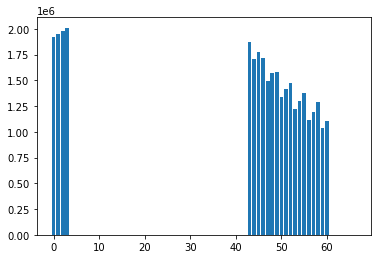

In [12]:
from matplotlib import pyplot

X_train_fs, X_test_fs, fs = select_features(x_train, y_train[:,0], x_test)
fea = features.columns.values
for i in range(len(fs.scores_)):
	print('%s %d: %f' % (fea[i],i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

open: , Score: 0.02065
high: , Score: 0.05174
low: , Score: 0.16694
close: , Score: 0.71823
volume: , Score: 0.00043
isFriday: , Score: 0.00013
isMonday: , Score: 0.00013
MOM_6: , Score: 0.00011
MOM_12: , Score: 0.00013
MOM_18: , Score: 0.00021
MOM_24: , Score: 0.00031
MOM_30: , Score: 0.00026
MOM_36: , Score: 0.00032
K_6: , Score: 0.00010
D_6: , Score: 0.00012
K_12: , Score: 0.00010
D_12: , Score: 0.00012
K_18: , Score: 0.00013
D_18: , Score: 0.00015
K_24: , Score: 0.00013
D_24: , Score: 0.00015
K_30: , Score: 0.00011
D_30: , Score: 0.00013
K_36: , Score: 0.00018
D_36: , Score: 0.00025
MACD_2: , Score: 0.00008
MACDsignal_2: , Score: 0.00007
MACDhist_6: , Score: 0.00015
MACD_5: , Score: 0.00010
MACDsignal_4: , Score: 0.00016
MACDhist_12: , Score: 0.00015
MACD_8: , Score: 0.00015
MACDsignal_6: , Score: 0.00020
MACDhist_18: , Score: 0.00014
MACD_11: , Score: 0.00017
MACDsignal_8: , Score: 0.00026
MACDhist_24: , Score: 0.00017
MACD_14: , Score: 0.00022
MACDsignal_10: , Score: 0.00042
MACD

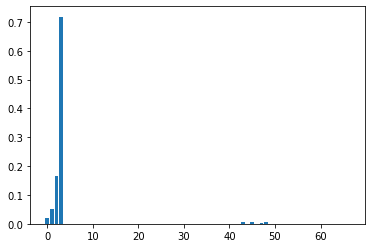

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('%s: , Score: %.5f' % (fea[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

ModuleNotFoundError: No module named 'xgboost'